In [2]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1 Hierarchical and grouped time series

## Example: Australian tourism hierarchy

In [3]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.07769
1998 Q2,Adelaide,South Australia,Business,109.98732
1998 Q3,Adelaide,South Australia,Business,166.03469
1998 Q4,Adelaide,South Australia,Business,127.16046
1999 Q1,Adelaide,South Australia,Business,137.44853
1999 Q2,Adelaide,South Australia,Business,199.91259
1999 Q3,Adelaide,South Australia,Business,169.35509
1999 Q4,Adelaide,South Australia,Business,134.35794
2000 Q1,Adelaide,South Australia,Business,154.03440


In [6]:
tourism <- tsibble::tourism 

tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.07769
1998 Q2,Adelaide,South Australia,Business,109.98732
1998 Q3,Adelaide,South Australia,Business,166.03469
1998 Q4,Adelaide,South Australia,Business,127.16046
1999 Q1,Adelaide,South Australia,Business,137.44853
1999 Q2,Adelaide,South Australia,Business,199.91259
1999 Q3,Adelaide,South Australia,Business,169.35509
1999 Q4,Adelaide,South Australia,Business,134.35794
2000 Q1,Adelaide,South Australia,Business,154.03440


In [7]:
tourism <- tsibble::tourism %>%
 mutate(
       State=recode(State,
    `New South Wales` = "NSW",
    `Northern Territory` = "NT",
    `Queensland` = "QLD",
    `South Australia` = "SA",
    `Tasmania` = "TAS",
    `Victoria` = "VIC",
    `Western Australia` = "WA"
                   )
       )

In [8]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,SA,Business,135.07769
1998 Q2,Adelaide,SA,Business,109.98732
1998 Q3,Adelaide,SA,Business,166.03469
1998 Q4,Adelaide,SA,Business,127.16046
1999 Q1,Adelaide,SA,Business,137.44853
1999 Q2,Adelaide,SA,Business,199.91259
1999 Q3,Adelaide,SA,Business,169.35509
1999 Q4,Adelaide,SA,Business,134.35794
2000 Q1,Adelaide,SA,Business,154.03440


- Using the aggregate_key() function, we can create the hierarchical time series with overnight trips in regions at the bottom level of the hierarchy, aggregated to states, which are aggregated to the national total. 
- A hierarchical time series corresponding to the nested structure is created using a parent/child specification.

In [9]:
tourism_hts <- tourism %>%
 aggregate_key(State / Region, Trips =sum(Trips))

tourism_hts

Quarter,State,Region,Trips
<qtr>,<chr*>,<chr*>,<dbl>
1998 Q1,<aggregated>,<aggregated>,23182.20
1998 Q2,<aggregated>,<aggregated>,20323.38
1998 Q3,<aggregated>,<aggregated>,19826.64
1998 Q4,<aggregated>,<aggregated>,20830.13
1999 Q1,<aggregated>,<aggregated>,22087.35
1999 Q2,<aggregated>,<aggregated>,21458.37
1999 Q3,<aggregated>,<aggregated>,19914.19
1999 Q4,<aggregated>,<aggregated>,20027.93
2000 Q1,<aggregated>,<aggregated>,22339.29


- The new tsibble now has some additional rows corresponding to state and national aggregations for each quarter

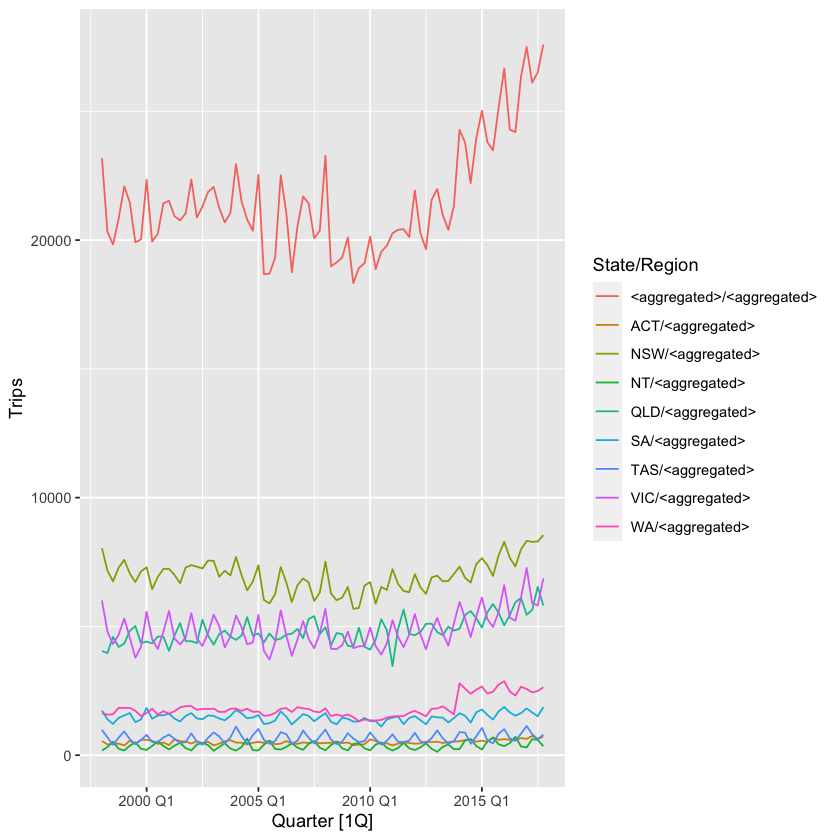

In [10]:
tourism_hts %>%
 filter(is_aggregated(Region)) %>%
 autoplot(Trips)

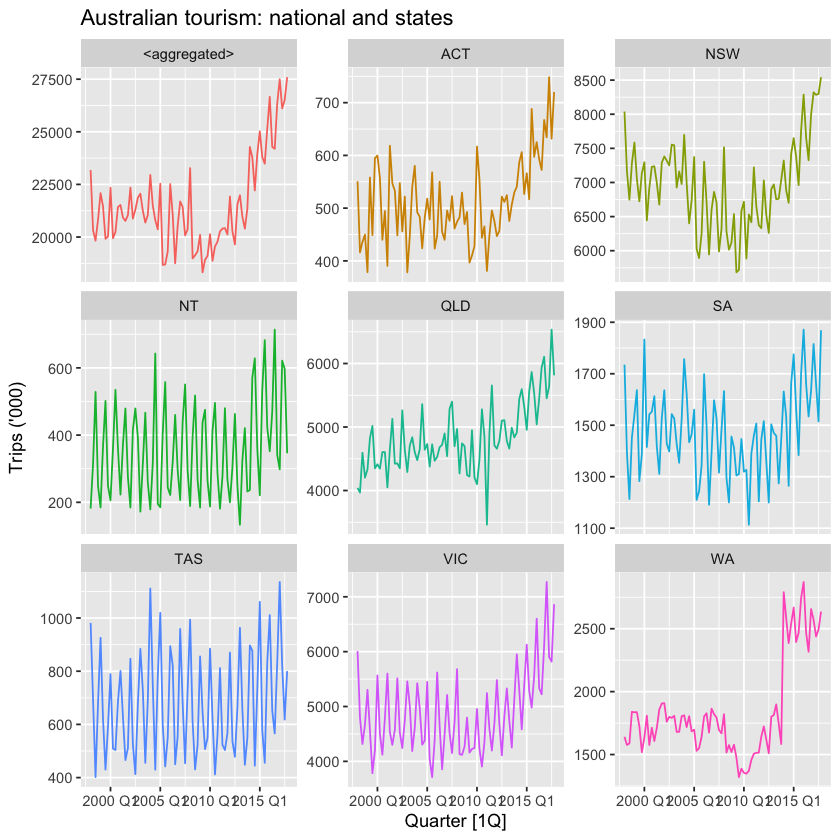

In [11]:
tourism_hts %>%
  filter(is_aggregated(Region)) %>%
  autoplot(Trips) +
  labs(y = "Trips ('000)",
       title = "Australian tourism: national and states") +
  facet_wrap(vars(State), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")


- The aggregate total overnight trips for the whole of Australia as well as the states, revealing diverse and rich dynamics.
- For example, there is noticeable national growth since 2010 and for some states such as the ACT, New South Wales, Queensland, South Australia, and Victoria.
- There seems to be a significant jump for Western Australia in 2014.

# Grouped time series
